In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
n = 4    #size of the lake (nxn)
m = 4    #number of holes
actions = 4 #number of actions

In [3]:
#creating an instance of frozen-lake
def create_lake(n,m):
    lake = np.array(list('F'*n*n)) #initializing the lake
    holes = random.sample(range(1,(n*n)-2), m)#random index of holes in n*n size lake
    lake[holes] = 'H'
    lake = lake.reshape(n,n)
    lake[0][0] = 'S'
    lake[n-1][n-1] = 'G'
    return lake,holes

print(create_lake(4,4)[0])
# S start
# F Frozen
# H Hole
# G Goal

[['S' 'F' 'H' 'F']
 ['F' 'F' 'H' 'F']
 ['H' 'F' 'F' 'H']
 ['F' 'F' 'F' 'G']]


In [4]:
#function that returns next state given current state and action
def next_state(curr_state, action):
    # Action 0 -> left
    # Action 1-> right
    # Action 2 -> up
    # Action 3 -> down
    state = 0
    s = curr_state
    if(s%n == 0 and action == 0):
        state = -1
    elif(s%n == n-1 and action == 1):
        state = -1
    elif(s in np.arange(0,n,1)  and action == 2):
        state = -1
    elif(s in np.arange(n*n-n,n*n,1) and action == 3):
        state = -1
    elif(action==0):
        state = s - 1
    elif(action==1):
        state = s + 1
    elif(action==2):
        state = s - n
    elif(action==3):
        state = s + n
    return state

In [5]:
n_episodes = 100       # number of episodes

In [6]:
def frozenlake(n,m,alpha,lamda):
    alpha = alpha           # Learning rate
    lamda = lamda         # Discount rate
    # Exploration parameters
    epsilon = 0.5          # Exploration rate
    lake, holes = create_lake(n,m)
    #initialzing Q Table
    q_table = np.zeros([n*n,actions])

    # List of rewards
    rewards = []

    for episode in range(n_episodes):
        # Reset the environment
        curr_state = 0
        goal = False #checks if goal is reached
        total_reward = 0

        while(True):
            # randomly chooses best action (off-policy learning)
            if(np.random.random()>epsilon):
                action = np.argmax(q_table[curr_state,:])
            else:
                action = np.random.randint(0,actions)

            # Take the action "a" and observe the outcome state and reward "r"
            new_state = next_state(curr_state, action)
            #print(curr_state," " , action)
            #print("new_state: ",new_state)
            reward = 0
            if(new_state in holes):
                reward = -50
            elif(new_state==-1):
                new_state = curr_state
                reward = -50
            elif(new_state == n*n-1):
                reward = 100
                goal = True
            # Update Q(s,a) = (1-alpha)Q(s,a) + alpha(R(s,a) + gamma * max Q(s',a'))
            q_table[curr_state][action] = ((1 - alpha)*q_table[curr_state][action] + 
                                      alpha*(reward + lamda*np.max(q_table[new_state, :])))

            total_reward += reward
            # update new state
            curr_state = new_state
            if(goal): 
                break
        rewards.append(total_reward)
    return rewards

total score:  -145.0


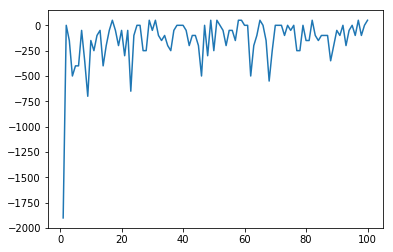

In [7]:
rewards = frozenlake(4,4,0.5,0.6)
print ("total score: " ,(sum(rewards)/n_episodes))
plt.plot(np.arange(1,n_episodes+1),rewards)

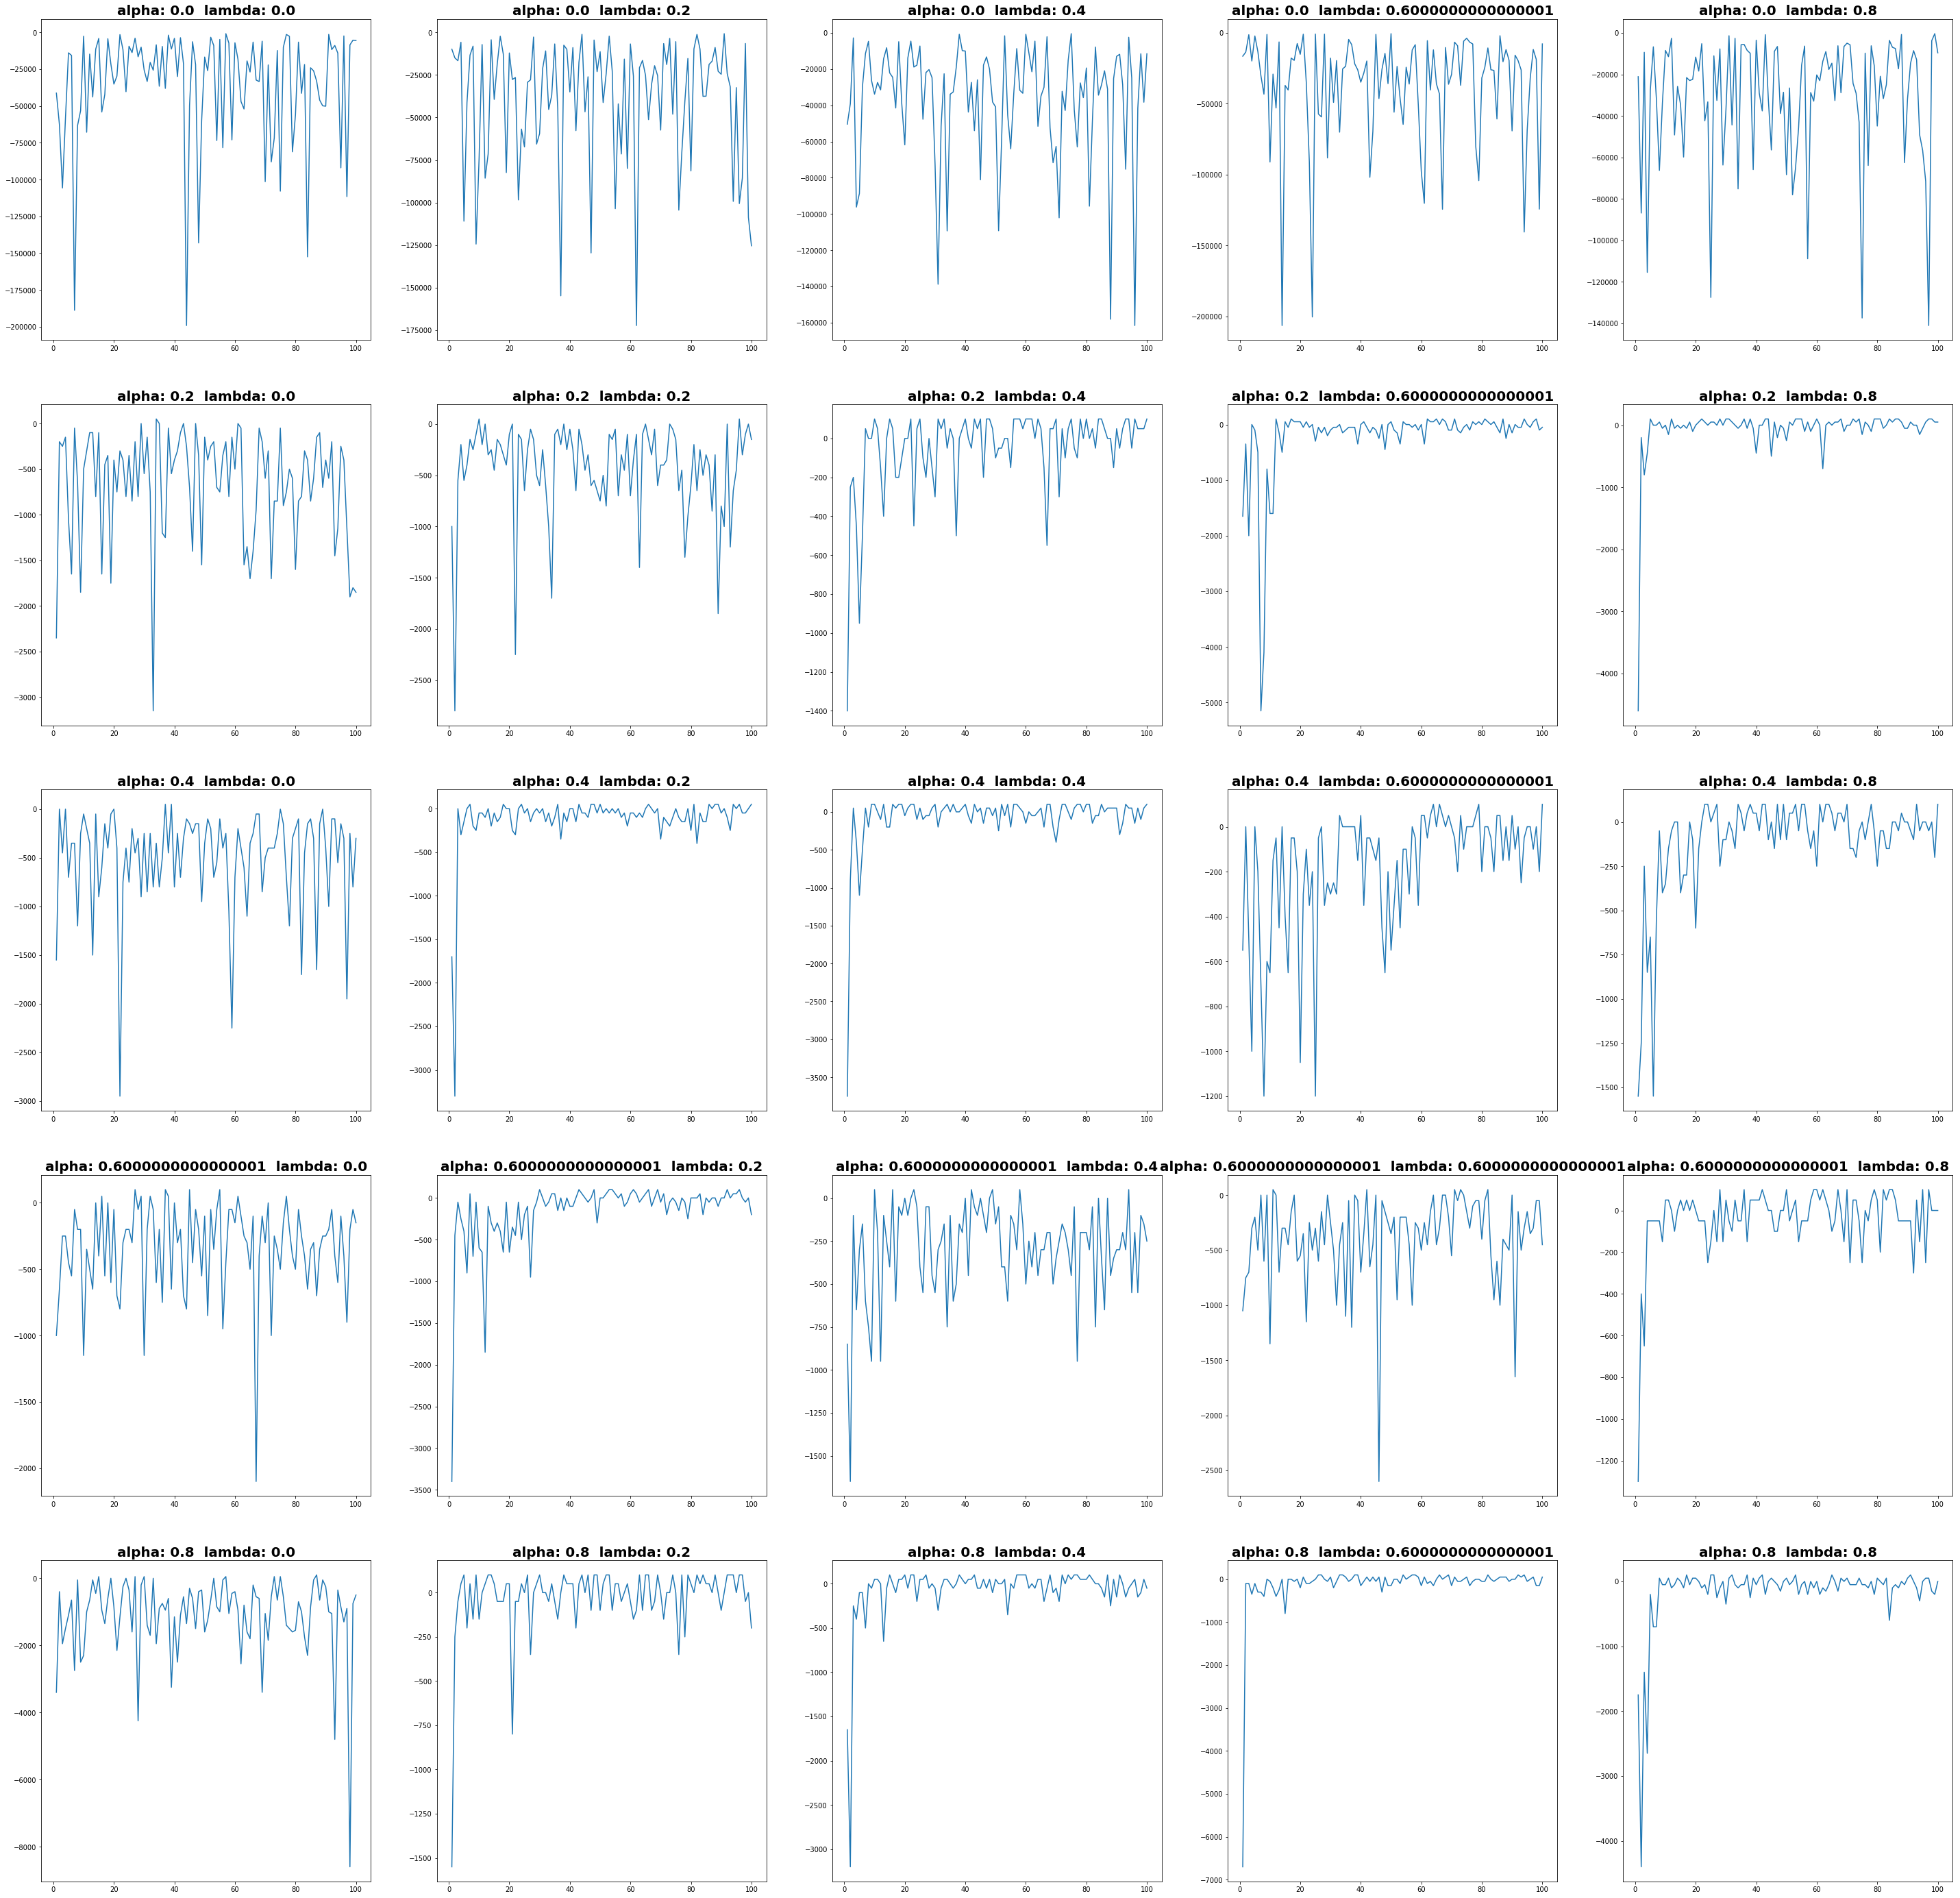

In [8]:
# change in learning performance with different alpha and lamda
alphas = np.arange(0,1,0.2)
lamdas = np.arange(0,1,0.2)
n = 4
m = 4
plt.rcParams["figure.figsize"] = (50,50)
f, ax = plt.subplots(5, 5)
for row,alpha in enumerate(alphas):
    for col,lamda in enumerate(lamdas):
        reward = frozenlake(n,m,alpha,lamda)
        ax[row, col].plot(np.arange(1,n_episodes+1), reward)
        ax[row, col].set_title("alpha: "+str(alpha)+"  lambda: "+str(lamda),fontweight="bold", size=20)

# Changes in learning performance with different alpha and lambda values
* It is seen that with low alpha(learning rate) values learning takes longer
* alpha = 0 indicates no learning -> no update to Q table

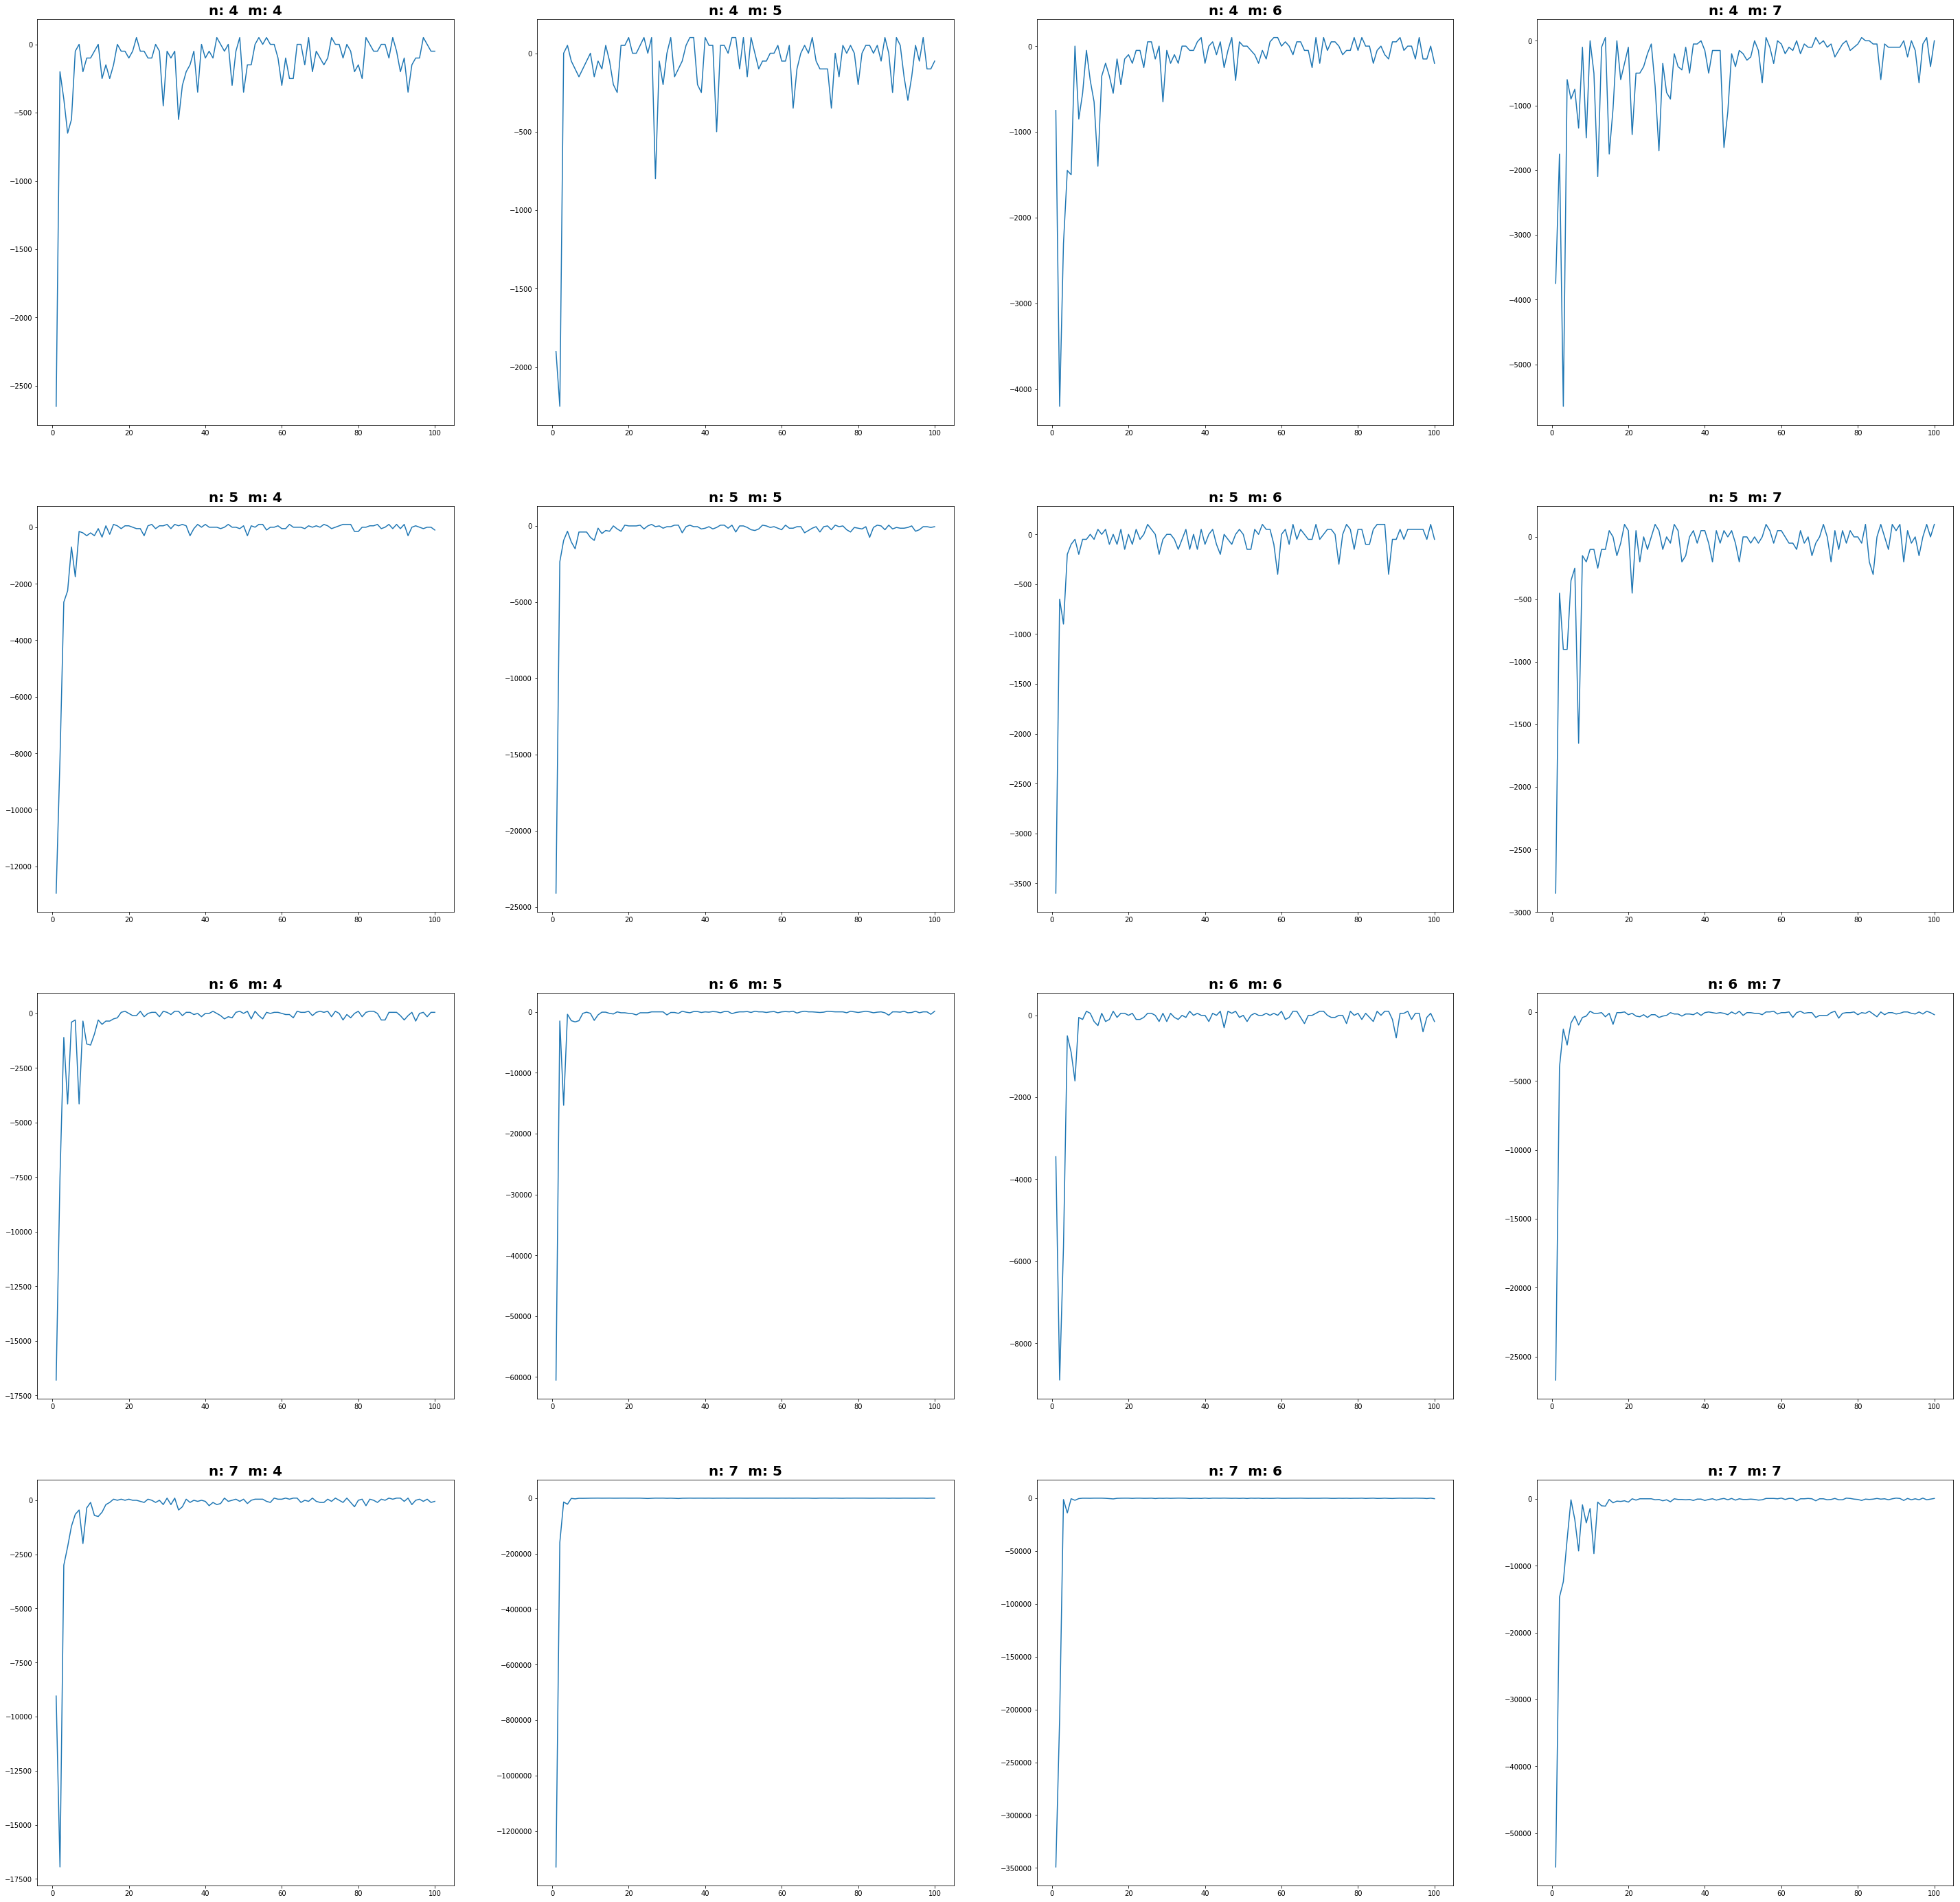

In [9]:
# change in learning performance with different n and m
ns = ms = [4,5,6,7]
plt.rcParams["figure.figsize"] = (50,50)
f, ax = plt.subplots(4, 4)
alpha = 0.6
lamba = 0.5
for row,n in enumerate(ns):
    for col,m in enumerate(ms):
        reward = frozenlake(n,m,alpha,lamda)
        ax[row, col].plot(np.arange(1,n_episodes+1), reward)
        ax[row, col].set_title("n: "+str(n)+"  m: "+str(m),fontweight="bold", size=20)

# Changes in learning with different N and M values
* It can be seen that learning happens quickly when size of the lake and number of holes are increased